In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)
from scipy import optimize
from numpy import e
from numpy import arctan2
from numpy import diag
from numpy import sqrt
from numpy import pi

In [2]:
f_kHz = [ 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35] 
P = [ -1.46398, -1.43257, -1.41623, -1.37727, -1.3402, -1.29434, -1.23025, -1.13851, -1.02919, -0.853257, -0.595646, -0.247306, 0.147404, 0.484057, 0.730609, 0.894726, 1.01335, 1.10031, 1.14455, 1.20034, 1.24407, 1.25463, 1.28931, 1.30891, 1.32651, 1.34209, 1.36345, 1.36722, 1.37677, 1.38431, 1.40743] 
sP = [ 0.0019635, 0.00235619, 0.00274889, 0.00314159, 0.00176715, 0.0019635, 0.00215984, 0.00235619, 0.00255254, 0.00274889, 0.0011781, 0.000628319, 0.000333794, 0.00141372, 0.00149226, 0.0015708, 0.00164934, 0.00172788, 0.00180642, 0.00188496, 0.0019635, 0.00204204, 0.00212058, 0.00219911, 0.00227765, 0.00235619, 0.00243473, 0.00251327, 0.00259181, 0.00267035, 0.00274889] 

In [8]:
from numpy import arctan
def fitfunc(x,R,L,C):
    w=x*1E3*2*pi;
    t=(1/(C*w)-L*w)/R;
    value=-arctan(t);
    #value[value<0]+=pi
    return value
                   
p_init = [28,1E-3,99E-9] # valori iniziali 
#_pts = np.linspace(f_kHz[0], f_kHz[-1],10000)
#plt.plot(_pts, fitfunc(_pts, *p_init), label="fit",linewidth=3.0)
p_best, pcov = optimize.curve_fit(
    fitfunc, f_kHz, P,          # assegno funzione di fit, ascisse e ordinate
   sigma=sP,                     # assegno gli errori sulle ordinate
    p0=p_init, bounds=(0, +np.inf) # imposto i valori iniziali dei parametri e
)      # intervalli ammessi [0, +∞)

---------------------------
Best fit values without errors
---------------------------
R = 30.176685776163975  +-  0.36156247488386445 Ohm
L = 0.0009610260471189116  +-  6.188255941455068e-06 H
C = 9.539979363065421e-08  +-  7.454693892222942e-10 F
---------------------------


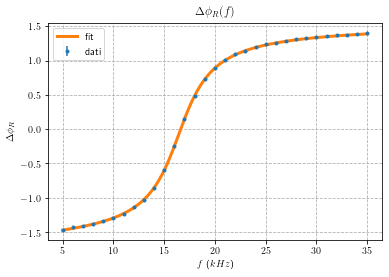

In [9]:
print("---------------------------")
print("Best fit values without errors")
print("---------------------------")
print("R =", p_best[0]," +- ",sqrt(diag(pcov)[0]), "Ohm")
print("L =", p_best[1]," +- ",sqrt(diag(pcov)[1]), "H")
print("C =", p_best[2]," +- ",sqrt(diag(pcov)[2]),"F")
print("---------------------------")
fig=plt.figure()
plt.grid(linestyle='--')
plt.rc('text', usetex=True)
plt.errorbar(f_kHz, P, yerr=sP, fmt='.', label='dati')
_pts = np.linspace(f_kHz[0], f_kHz[-1],10000)
plt.plot(_pts, fitfunc(_pts, *p_best), label="fit",linewidth=3.0)
plt.title("$\Delta \phi _R (f) $")
plt.xlabel("$f$ ($ kHz$)")
plt.ylabel("$\Delta \phi _R$")
plt.legend();
#fig.savefig('fitnosigma_rlr.pdf')

In [10]:
res = []
chisqv=0
sigmasq=0
for i in range (0,len(P)):
    res.insert(i,P[i]-fitfunc(f_kHz[i], *p_best))
    sigmasq+=(res[i])**2
    chisqv+=(res[i]/sP[i])**2
sigma_P=np.full(len(P),sqrt(sigmasq/(len(P)-4)))
print("chisq=",chisqv)

chisq= 494.02175341054283


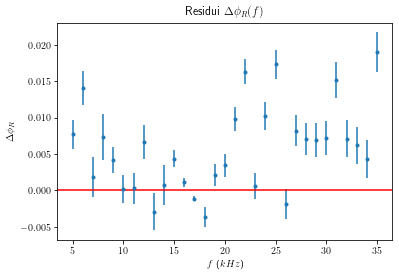

In [11]:
plt.figure(1)
plt.errorbar(f_kHz, res, yerr=sP, fmt='.')
plt.axhline(0, color='r')
plt.title("Residui $\Delta \phi _R (f) $")
plt.xlabel("$f$ ($ kHz$)")
plt.ylabel("$\Delta \phi _R-$fit")
plt.show()

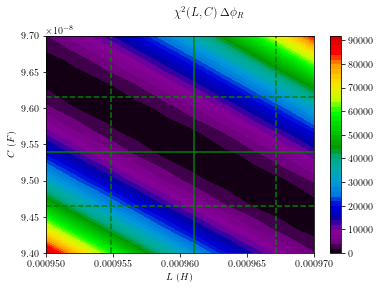

In [19]:
import matplotlib.pyplot as plt
def fitfuncplot(x,L,C):
    R=p_best[0]
    w=x*1E3*2*pi;
    t=(1/(C*w)-L*w)/R;
    return -arctan(t);
def chisquared(L,C):
    chisq=0
    for i in range (0,len(P)):
        chisq+=((P[i]-fitfuncplot(f_kHz[i],L,C))/sP[i])**2
    return chisq
fig=plt.figure()
y=np.linspace(94E-9,97E-9,10)
x=np.linspace(0.95E-3,0.97E-3,10)
#y=np.linspace(52,56,10)
z = np.array([chisquared(i,j) for j in y for i in x])
X, Y = np.meshgrid(x, y)
Z = z.reshape(10, 10)
plt.contourf(X, Y, Z,50,vmin=0,vmax=1E5,cmap='nipy_spectral')
fig.suptitle(' $\chi ^2 (L,C) \, \Delta \phi _R$ ')
plt.xlabel('$L$ $(H)$')
#plt.ylabel('$R$ ($\Omega$)')
plt.ylabel('$C$ $(F)$')
plt.colorbar()
plt.axvline(p_best[1], color='g')
plt.axhline(p_best[2], color='g')
plt.axvline(p_best[1]+sqrt(diag(pcov)[1]),color='g',linestyle='--')
plt.axvline(p_best[1]-sqrt(diag(pcov)[1]),color='g',linestyle='--')
plt.axhline(p_best[2]+sqrt(diag(pcov)[2]),color='g',linestyle='--')
plt.axhline(p_best[2]-sqrt(diag(pcov)[2]),color='g',linestyle='--')
#fig.savefig('chisqLCrlr.pdf')